In [1]:
import numpy as np
import mth433 as mth
import matplotlib.pyplot as plt

In [2]:
def get_h(x):
    """
    We are finding the length of the jth subinterval.
    Input: A vector x
    Output: A vector with distances between the elements of x from j+1 to j
    """
    n = len(x)
    h = []
    for j in range(n-1):
        h_2 = round((x[j+1] - x[j]),5)
        h.append(h_2)
    return h

In [3]:
def get_c(h,y):
    """
    We are finding a column vector made up of our desired coefficients by using Ac = z, where we use h to find A.
    Input(s): The length of the jth subinterval h and an input vector y
    Output: a column matrix c
    """
    n = len(h)
    c = []
    z = np.zeros(n-1)
    A = np.zeros((n-1,n-1))
    
    for j in range(n-1):
        A[j,j] = 2*(h[j] + h[j+1])
        
    for j in range(1,n-1):
        A[j,j-1] = h[j]
        A[j-1,j] = h[j]

    for j in range(n-1):
        z[j] = 3*(((y[j+2] - y[j+1])/h[j+1]) - ((y[j+1] - y[j])/h[j]))

    c = np.linalg.solve(A,z)
    c = np.insert(c,0,0)
    c = np.insert(c,n,0)
    return c

In [4]:
def get_b(c,h,y):
    """
    We are trying to find the coefficient for b, by utilizing c,h,j
    Inputs: We are inputting our y vector, our coefficents for c, and the length of the jth subinterval h
    Output: a column matrix b
    """
    n = len(y)
    b = []
    for j in range(0,n-1):
        b_2 = ((y[j+1] - y[j])/h[j]) - (((2*c[j] + c[j+1])*h[j])/3)
        b.append(b_2)
    return b

In [5]:
def get_d(c,h):
    """
    We are trying to find the coefficient for d, by utilizing c and h 
    Inputs: Our coefficents for c and the length of the jth subinterval h
    Output: a column matrix d
    """
    n = len(c)
    d = []
    for j in range(n-1):
        d_2 = (c[j+1] - c[j])/(3*h[j])
        d.append(d_2)
    return d

In [6]:
def cubic_co(pts):
    """
    A function that inputs an (n+1)x2 matrix pts where the first column are the x-coordinates 
    and the second column is the y-coordinates and outputs a nx4 matrix whose columns are the a,b,c,d coordinates
    Input: A (n+1)x2 matrix (pts)
    Output: A nx4 matrix whose columns are the a,b,c,d coordinates
    """
    n = len(pts)
    x = pts[:,0]
    y = pts[:,1]
    a = np.delete(y, -1)
    h = get_h(x)
    c = get_c(h,y)
    b = get_b(c,h,y)
    d = get_d(c,h)
    c = np.delete(c, -1)
    Q = np.array([a,b,c,d]).T
    return Q

In [7]:
def plot_cubic(a,b,c,d,left,right):
    """
    Plots the cubic function p(x) = a + b(x - left) + c(x - left)^2 + d(x - left)^3 on the interval [left,right] 
    Input: coeffiecents a,b,c,d and an interval from left to right
    Output: The graph of our desired cubic function
    """
    x = np.linspace(left,right,num=100)
    y = a + b*(x - left) + c*(x - left)**2 + d*(x - left)**3
    return plt.plot(x,y)

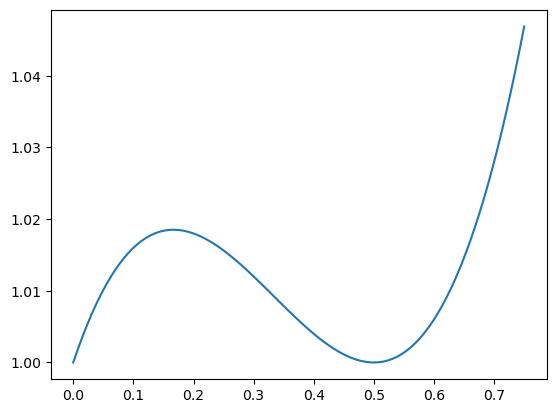

In [8]:
plot_cubic(1,0.25,-1,1,0,0.75)

In [15]:
def plot_spline(coef,x):
    """
    We are taking a coefficient matrix and another vector, x, and plotting a spline.
    
    Note: For each j=0,...,n-1 coef[j:j+1,:] are the four coefficient of a cubic polynomial
          and x[j], x[j+1] are the left and right endpoints where we want to plot the cubic.
          You may assume that x[j] < x[j+1] for all j since that is what will eventually happen.
          
    Inputs: Coef which is nx4 numpy array and x which is an (n+1)x1 numpy array
    Output: plot_spline should plot all n-1 of these cubics on the same plot
    """
    n,_ = coef.shape
    for j in range(n):
        a,b,c,d = coef[j]
        plot = plot_cubic(a,b,c,d,x[j],x[j+1])
    return plot

In [16]:
co = np.array([[ -3.        ,  23.49794239,   0.        , -87.44855967],
       [  1.        ,  13.00411523, -52.4691358 ,  62.24279835],
       [  2.        ,  -0.51440329, -15.12345679,  17.37540009],
       [  0.        ,   0.10288066,  16.15226337, -17.9469593 ]])

In [17]:
x = np.array([1,1.2,1.4,2,2.3]).T

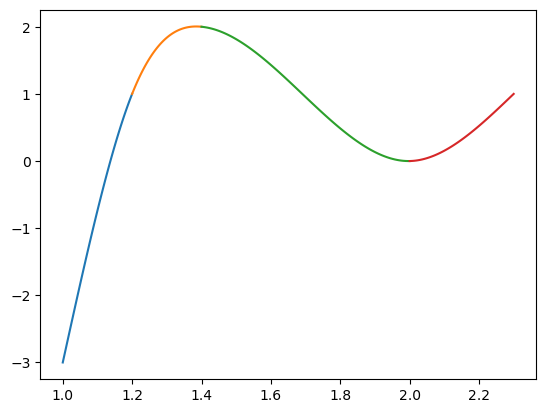

In [18]:
plot_spline(co,x)

In [ ]:
def test(pts):
    """
    Testing the validity of the previously created functions
    Input: pts vector
    Output: a plot
    """
    x = pts[:,0:1]
    y = pts[:,1:2]
    cubic = cubic_co(pts)
    plot = plot_spline(cubic,x)
    return plot

In [ ]:
pts = np.array([[1,1.2,1.4,2,2.3],[-3,1,2,0,1]]).T

In [ ]:
test(pts)